In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'C:\\Users\\venka\\Downloads'

In [3]:
Df = pd.read_csv("Df.csv")
Df

,Time,Open,High,Low,Close,Volume
0,2010-01-01,1.43283,1.43293,1.43224,1.43293,608600007.1
1,2010-01-01,1.43285,1.43295,1.43229,1.43275,535600003.2
2,2010-01-01,1.43280,1.43303,1.43239,1.43281,436299999.2
3,2010-01-01,1.43285,1.43294,1.43229,1.43276,614299997.3
4,2010-01-01,1.43287,1.43292,1.43206,1.43282,705300008.8
...,...,...,...,...,...,...
245439,2016-12-31,1.05150,1.05150,1.05150,1.05150,0.0
245440,2016-12-31,1.05150,1.05150,1.05150,1.05150,0.0
245441,2016-12-31,1.05150,1.05150,1.05150,1.05150,0.0
245442,2016-12-31,1.05150,1.05150,1.05150,1.05150,0.0


In [4]:
Df = Df.drop(Df[Df.Volume == 0].index)
Df

,Time,Open,High,Low,Close,Volume
0,2010-01-01,1.43283,1.43293,1.43224,1.43293,6.086000e+08
1,2010-01-01,1.43285,1.43295,1.43229,1.43275,5.356000e+08
2,2010-01-01,1.43280,1.43303,1.43239,1.43281,4.363000e+08
3,2010-01-01,1.43285,1.43294,1.43229,1.43276,6.143000e+08
4,2010-01-01,1.43287,1.43292,1.43206,1.43282,7.053000e+08
...,...,...,...,...,...,...
245335,2016-12-30,1.05358,1.05376,1.05238,1.05247,1.911700e+09
245336,2016-12-30,1.05244,1.05251,1.05179,1.05180,8.912800e+08
245337,2016-12-30,1.05179,1.05204,1.05141,1.05191,8.146200e+08
245338,2016-12-30,1.05191,1.05193,1.05140,1.05156,4.275700e+08


In [5]:
Df['Volume in Billions'] = Df['Volume']/1000000000
Df

,Time,Open,High,Low,Close,Volume,Volume in Billions
0,2010-01-01,1.43283,1.43293,1.43224,1.43293,6.086000e+08,0.60860
1,2010-01-01,1.43285,1.43295,1.43229,1.43275,5.356000e+08,0.53560
2,2010-01-01,1.43280,1.43303,1.43239,1.43281,4.363000e+08,0.43630
3,2010-01-01,1.43285,1.43294,1.43229,1.43276,6.143000e+08,0.61430
4,2010-01-01,1.43287,1.43292,1.43206,1.43282,7.053000e+08,0.70530
...,...,...,...,...,...,...,...
245335,2016-12-30,1.05358,1.05376,1.05238,1.05247,1.911700e+09,1.91170
245336,2016-12-30,1.05244,1.05251,1.05179,1.05180,8.912800e+08,0.89128
245337,2016-12-30,1.05179,1.05204,1.05141,1.05191,8.146200e+08,0.81462
245338,2016-12-30,1.05191,1.05193,1.05140,1.05156,4.275700e+08,0.42757


In [6]:
Df = Df.rename(columns={'Time':'Date'})
Df

,Date,Open,High,Low,Close,Volume,Volume in Billions
0,2010-01-01,1.43283,1.43293,1.43224,1.43293,6.086000e+08,0.60860
1,2010-01-01,1.43285,1.43295,1.43229,1.43275,5.356000e+08,0.53560
2,2010-01-01,1.43280,1.43303,1.43239,1.43281,4.363000e+08,0.43630
3,2010-01-01,1.43285,1.43294,1.43229,1.43276,6.143000e+08,0.61430
4,2010-01-01,1.43287,1.43292,1.43206,1.43282,7.053000e+08,0.70530
...,...,...,...,...,...,...,...
245335,2016-12-30,1.05358,1.05376,1.05238,1.05247,1.911700e+09,1.91170
245336,2016-12-30,1.05244,1.05251,1.05179,1.05180,8.912800e+08,0.89128
245337,2016-12-30,1.05179,1.05204,1.05141,1.05191,8.146200e+08,0.81462
245338,2016-12-30,1.05191,1.05193,1.05140,1.05156,4.275700e+08,0.42757


In [7]:
Df["Date"]= pd.to_datetime(Df["Date"])
Df

,Date,Open,High,Low,Close,Volume,Volume in Billions
0,2010-01-01,1.43283,1.43293,1.43224,1.43293,6.086000e+08,0.60860
1,2010-01-01,1.43285,1.43295,1.43229,1.43275,5.356000e+08,0.53560
2,2010-01-01,1.43280,1.43303,1.43239,1.43281,4.363000e+08,0.43630
3,2010-01-01,1.43285,1.43294,1.43229,1.43276,6.143000e+08,0.61430
4,2010-01-01,1.43287,1.43292,1.43206,1.43282,7.053000e+08,0.70530
...,...,...,...,...,...,...,...
245335,2016-12-30,1.05358,1.05376,1.05238,1.05247,1.911700e+09,1.91170
245336,2016-12-30,1.05244,1.05251,1.05179,1.05180,8.912800e+08,0.89128
245337,2016-12-30,1.05179,1.05204,1.05141,1.05191,8.146200e+08,0.81462
245338,2016-12-30,1.05191,1.05193,1.05140,1.05156,4.275700e+08,0.42757


In [8]:
Df1 = Df.loc[(Df['Date']>='2016-10-1') & (Df['Date']<='2016-12-30')]
Df1

,Date,Open,High,Low,Close,Volume,Volume in Billions
236616,2016-10-01,1.12054,1.12107,1.12054,1.12094,1.276988e+10,12.76988
236617,2016-10-01,1.12094,1.12143,1.12089,1.12143,8.992100e+09,8.99210
236618,2016-10-01,1.12143,1.12156,1.12118,1.12138,1.014207e+10,10.14207
236619,2016-10-01,1.12138,1.12155,1.12131,1.12149,1.239483e+10,12.39483
236620,2016-10-01,1.12149,1.12212,1.12144,1.12178,1.481144e+10,14.81144
...,...,...,...,...,...,...,...
245335,2016-12-30,1.05358,1.05376,1.05238,1.05247,1.911700e+09,1.91170
245336,2016-12-30,1.05244,1.05251,1.05179,1.05180,8.912800e+08,0.89128
245337,2016-12-30,1.05179,1.05204,1.05141,1.05191,8.146200e+08,0.81462
245338,2016-12-30,1.05191,1.05193,1.05140,1.05156,4.275700e+08,0.42757


In [9]:
Df1 = Df1.reset_index()
Df1

,index,Date,Open,High,Low,Close,Volume,Volume in Billions
0,236616,2016-10-01,1.12054,1.12107,1.12054,1.12094,1.276988e+10,12.76988
1,236617,2016-10-01,1.12094,1.12143,1.12089,1.12143,8.992100e+09,8.99210
2,236618,2016-10-01,1.12143,1.12156,1.12118,1.12138,1.014207e+10,10.14207
3,236619,2016-10-01,1.12138,1.12155,1.12131,1.12149,1.239483e+10,12.39483
4,236620,2016-10-01,1.12149,1.12212,1.12144,1.12178,1.481144e+10,14.81144
...,...,...,...,...,...,...,...,...
6303,245335,2016-12-30,1.05358,1.05376,1.05238,1.05247,1.911700e+09,1.91170
6304,245336,2016-12-30,1.05244,1.05251,1.05179,1.05180,8.912800e+08,0.89128
6305,245337,2016-12-30,1.05179,1.05204,1.05141,1.05191,8.146200e+08,0.81462
6306,245338,2016-12-30,1.05191,1.05193,1.05140,1.05156,4.275700e+08,0.42757


<AxesSubplot:xlabel='Date'>

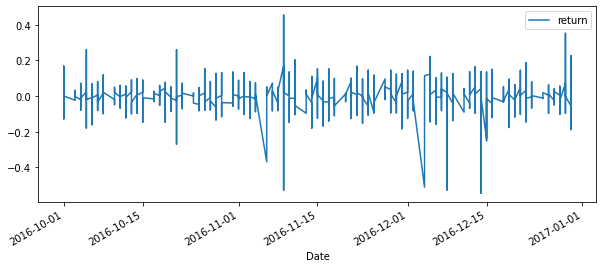

In [10]:
Df1['return'] = Df1['Close']-Df1['Close'].shift(1)
return_range = Df1['return'].max()-Df1['return'].min()
Df1['return'] = Df1['return'] / return_range
Df1.plot(x='Date', y='return', figsize=(10,4))

In [11]:
Df1['label'] = Df1['return'].shift(-1)
Df1['label'] = Df1['label'].apply(lambda x: 1 if x>0.0 else 0)
Df1

,index,Date,Open,High,Low,Close,Volume,Volume in Billions,return,label
0,236616,2016-10-01,1.12054,1.12107,1.12054,1.12094,1.276988e+10,12.76988,NaN,1
1,236617,2016-10-01,1.12094,1.12143,1.12089,1.12143,8.992100e+09,8.99210,0.032515,0
2,236618,2016-10-01,1.12143,1.12156,1.12118,1.12138,1.014207e+10,10.14207,-0.003318,1
3,236619,2016-10-01,1.12138,1.12155,1.12131,1.12149,1.239483e+10,12.39483,0.007299,1
4,236620,2016-10-01,1.12149,1.12212,1.12144,1.12178,1.481144e+10,14.81144,0.019244,0
...,...,...,...,...,...,...,...,...,...,...
6303,245335,2016-12-30,1.05358,1.05376,1.05238,1.05247,1.911700e+09,1.91170,-0.075647,0
6304,245336,2016-12-30,1.05244,1.05251,1.05179,1.05180,8.912800e+08,0.89128,-0.044459,1
6305,245337,2016-12-30,1.05179,1.05204,1.05141,1.05191,8.146200e+08,0.81462,0.007299,0
6306,245338,2016-12-30,1.05191,1.05193,1.05140,1.05156,4.275700e+08,0.42757,-0.023225,0


In [12]:
n_features = 6000 # number of features

train_x = np.array([]).reshape([-1,n_features])
train_y = np.array([]).reshape([-1,1])
for index, row in Df1.iterrows():
    i = Df1.index.get_loc(index)
    if i<n_features:
        continue  
    _x = np.array(Df1[i-n_features+1:i+1]['return']).T.reshape([1, -1])
    _y = Df1.loc[i]['label']
    train_x = np.vstack((train_x, _x))
    train_y = np.vstack((train_y, _y))
train_y = train_y.reshape([-1])
print(train_x.shape)
print(train_y.shape)
print('%% of Class0 : %f' % (np.count_nonzero(train_y == 0)/float(len(train_y))))
print('%% of Class1 : %f' % (np.count_nonzero(train_y == 1)/float(len(train_y))))

(308, 6000)
(308,)
% of Class0 : 0.480519
% of Class1 : 0.519481


# Define Model and fit
# Here we use 95% of data for training, and last 5% for testing

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0, learning_rate=0.009, n_estimators=10)

train_len = int(len(train_x)*0.85)
clf.fit(train_x[:train_len], train_y[:train_len])

accuracy = clf.score(train_x[train_len:], train_y[train_len:])
print('Testing Accuracy: %f' % accuracy)

In [13]:
Df1 = Df1.groupby('Date').mean()
Df1

,index,Open,High,Low,Close,Volume,Volume in Billions,return,label
Date,,,,,,,,,
2016-10-01,236655.5,1.120924,1.121355,1.120519,1.120965,1.648336e+10,16.483356,0.002503,0.487500
2016-10-03,236895.5,1.123439,1.123686,1.123122,1.123452,4.931503e+09,4.931503,-0.003525,0.250000
2016-10-04,236951.5,1.122401,1.122623,1.122135,1.122375,1.040009e+10,10.400094,-0.001707,0.479167
2016-10-05,237047.5,1.118758,1.119180,1.118412,1.118763,1.281838e+10,12.818379,0.000297,0.416667
2016-10-06,237143.5,1.121287,1.121582,1.120992,1.121278,1.174931e+10,11.749305,-0.000553,0.520833
...,...,...,...,...,...,...,...,...,...
2016-12-26,244915.5,1.045348,1.045606,1.045132,1.045347,1.109680e+09,1.109680,0.000104,0.489583
2016-12-27,245011.5,1.044936,1.045164,1.044717,1.044944,1.081381e+09,1.081381,0.000525,0.520833
2016-12-28,245107.5,1.043043,1.043341,1.042691,1.042995,1.604395e+09,1.604395,-0.003256,0.489583


In [14]:
df_L = Df1[['return']]
df_L = df_L.reset_index()
del df_L['Date']
df_L

,return
0,0.002503
1,-0.003525
2,-0.001707
3,0.000297
4,-0.000553
...,...
73,0.000104
74,0.000525
75,-0.003256
76,0.010472


In [15]:
len(df_L)

78

<AxesSubplot:>

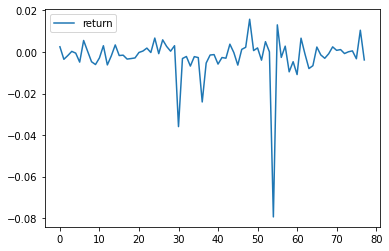

In [16]:
df_L.plot()

In [17]:
df_L = np.array(df_L).reshape(-1,1)
df_L

array([[ 2.50308686e-03],
       [-3.52521566e-03],
       [-1.70731033e-03],
       [ 2.97224065e-04],
       [-5.52975006e-04],
       [-4.87309224e-03],
       [ 5.54080956e-03],
       [ 3.73258129e-04],
       [-4.69337536e-03],
       [-6.04125194e-03],
       [-2.84782128e-03],
       [ 3.00680159e-03],
       [-6.22096881e-03],
       [-1.86629064e-03],
       [ 3.40079628e-03],
       [-1.70731033e-03],
       [-1.53450564e-03],
       [-3.41462066e-03],
       [-3.16025216e-03],
       [-2.86164565e-03],
       [-2.28102190e-04],
       [ 4.56204380e-04],
       [ 1.87320283e-03],
       [-2.55750940e-04],
       [ 6.70205707e-03],
       [-8.08725946e-04],
       [ 5.84771068e-03],
       [ 2.66810440e-03],
       [ 3.87082504e-04],
       [ 3.02556324e-03],
       [-3.59157266e-02],
       [-3.14504534e-03],
       [-2.16351471e-03],
       [-6.78085601e-03],
       [-2.23263658e-03],
       [-2.69198287e-03],
       [-2.40544127e-02],
       [-5.32929662e-03],
       [-1.4

In [18]:
##Spitting dataset into train test split
training_size=int(len(df_L)*0.75)
test_size=len(df_L)-training_size

In [19]:
train_set,test_set=df_L[0:training_size],df_L[training_size:len(df_L)]

In [20]:
#Convert array of values into dataset_matrix
def create_dataset(dataset,time_step):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [21]:
time_step=10
X_train,y_train=create_dataset(train_set,time_step)
X_test,y_test=create_dataset(test_set,time_step)

In [22]:
print(X_train.shape)
print(X_test.shape)

(47, 10)
(9, 10)


In [23]:
#reshape input as [samples,time_step,feature] convert it to 3 dimentional array as required by LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
#Creating a stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Flatten

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=0)

In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
math.sqrt(mean_squared_error(y_test,test_predict))

0.005565336002114305

In [28]:
len(test_set)-time_step

10

In [29]:
x_input=test_set[(len(test_set)-time_step):].reshape(1,-1)

In [30]:
x_input.shape

(1, 10)

In [31]:
#Converting it to list
temp_input=list(x_input)
#Arranging list vertically
temp_input=temp_input[0].tolist()

In [32]:
temp_input

[-0.000836374695863706,
 0.0024676509621764206,
 0.0007949015704490095,
 0.0011612475116125542,
 -0.0007465162574645315,
 0.00010368281353674047,
 0.0005253262552533302,
 -0.003255640345056415,
 0.010471964167219698,
 -0.0038306086746697247]

In [33]:
#demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
future_day=10
n_steps=10
i=0
#Forcast next 10 days output
while(i<future_day):

  if(len(temp_input) >10):

    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    #Converting to 3d array for lstm
    x_input=x_input.reshape(1,n_steps,1)
    #print(x_input)
    ypred=model.predict(x_input,verbose=0)
    print("{} day predicted output {}".format(i,ypred))
    #adding predicted output  to temp_input list
    temp_input.extend(ypred[0].tolist())
    temp_input=temp_input[1:]

    #print(temp_input)
    lst_output.extend(ypred.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    ypred=model.predict(x_input,verbose=0)
    print("Predicted y of 0 day",ypred[0])
    #Addding ypred value in temp_input(previous input)
    temp_input.extend(ypred[0].tolist())
    print(len(temp_input))
    lst_output.extend(ypred.tolist())
    i=i+1

print(lst_output)

Predicted y of 0 day [-0.00325349]
11
1 day input [ 0.00246765  0.0007949   0.00116125 -0.00074652  0.00010368  0.00052533
 -0.00325564  0.01047196 -0.00383061 -0.00325349]
1 day predicted output [[-0.00326519]]
2 day input [ 0.0007949   0.00116125 -0.00074652  0.00010368  0.00052533 -0.00325564
  0.01047196 -0.00383061 -0.00325349 -0.00326519]
2 day predicted output [[-0.00322958]]
3 day input [ 0.00116125 -0.00074652  0.00010368  0.00052533 -0.00325564  0.01047196
 -0.00383061 -0.00325349 -0.00326519 -0.00322958]
3 day predicted output [[-0.00320096]]
4 day input [-0.00074652  0.00010368  0.00052533 -0.00325564  0.01047196 -0.00383061
 -0.00325349 -0.00326519 -0.00322958 -0.00320096]
4 day predicted output [[-0.0031587]]
5 day input [ 0.00010368  0.00052533 -0.00325564  0.01047196 -0.00383061 -0.00325349
 -0.00326519 -0.00322958 -0.00320096 -0.0031587 ]
5 day predicted output [[-0.00312912]]
6 day input [ 0.00052533 -0.00325564  0.01047196 -0.00383061 -0.00325349 -0.00326519
 -0.0032

In [34]:
previous_days=np.arange(1,n_steps+1)
predicted_future=np.arange(n_steps+1,future_day+ n_steps+1)

In [35]:
print(previous_days)
print(predicted_future)

[ 1  2  3  4  5  6  7  8  9 10]
[11 12 13 14 15 16 17 18 19 20]


In [36]:
outputlist=df_L.tolist()
outputlist.extend(lst_output)
df_L[len(df_L)-n_steps:]

array([[-0.00083637],
       [ 0.00246765],
       [ 0.0007949 ],
       [ 0.00116125],
       [-0.00074652],
       [ 0.00010368],
       [ 0.00052533],
       [-0.00325564],
       [ 0.01047196],
       [-0.00383061]])

In [37]:
lst_output

[[-0.0032534878700971603],
 [-0.003265185747295618],
 [-0.00322957755997777],
 [-0.0032009612768888474],
 [-0.0031587020494043827],
 [-0.003129122778773308],
 [-0.0030850847251713276],
 [-0.00303477980196476],
 [-0.003023727796971798],
 [-0.0028719548135995865]]

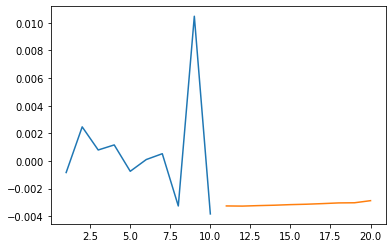

In [38]:
#Selecting last 10 days input from the dataframe df1 for first plot
plt.plot(previous_days,df_L[len(df_L)-n_steps:])
#Selecting predicted output from the listof the above function
plt.plot(predicted_future,lst_output)

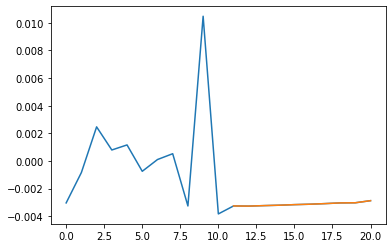

In [40]:
plt.plot(outputlist[len(df_L)-n_steps-1:])
plt.plot(predicted_future,lst_output)